In [1]:
from matplotlib import pyplot as plt
import numpy as np
#from sympy import *
#from sympy import MatrixSymbol, Matrix
import math
import cmath
import pandas as pd

# Database e input dati

In [2]:
# da interno a esterno

# gli input sono le key: descrizione, strati, spessori, trasmittane, mu, 
#                        densità, caloreSpecifico
# alla fine del calcolo saranno salvate key
pareti = {
     "1a" : {
        "descrizione"     : "Parete in muratura con isolante interno",
        "strati"          : ["Intonaco","Isolante VentirockDuo","Laterizio Poroton","Intonaco"],
        "spessori"        : np.array([0.015,0.14,0.2,0.015]),
        "trasmittanze"    : np.array([0.6,0.035,0.23,0.9]),
        "mu"              : np.array([6.,1.,10.,8.]),
        "densità"         : np.array([1500.,70.,860.,1800.]),
        "caloreSpecifico" : np.array([1000.,1030.,840.,1000.])
    },
    "1b" : {
        "descrizione"     : "Parete in muratura con isolante esterno",
        "strati"          : ["Intonaco","Laterizio Poroton","Isolante VentirockDuo","Intonaco"],
        "spessori"        : np.array([0.015,0.2,0.14,0.015]),
        "trasmittanze"    : np.array([0.6,0.23,0.035,0.9]),
        "mu"              : np.array([6.,10.,1.,8.]),
        "densità"         : np.array([1500.,860.,70.,1800.]),
        "caloreSpecifico" : np.array([1000.,840.,1030.,1000.])
    },
    "3a" : {
        "descrizione"     : "Perete in X-LAM con isolante bassa densità",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante bassa densità","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.12,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.038,0.9]),
        "mu"              : np.array([5.,25.,1.,20.]),
        "densità"         : np.array([1150.,500.,50.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,2100.,1000.])
    },
    "3b" : {
        "descrizione"     : "Perete in X-LAM con isolante bassa densità lana di roccia",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante VentirockDuo","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.105,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.035,0.9]),
        "mu"              : np.array([5.,25.,1.,20.]),
        "densità"         : np.array([1150.,500.,70.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,1030.,1000.])
    },
    "3c" : {
        "descrizione"     : "Perete in X-LAM con isolante alta densità fibra di legno",
        "strati"          : ["Gessofibra","X-LAM KLH","Isolante alta densità Naturalia Diffuterm","Intonaco calce"],
        "spessori"        : np.array([0.013,0.096,0.13,0.015]),
        "trasmittanze"    : np.array([0.21,0.13,0.043,0.9]),
        "mu"              : np.array([5.,25.,5.,20.]),
        "densità"         : np.array([1150.,500.,190.,1800.]),
        "caloreSpecifico" : np.array([1100.,1600.,2100.,1000.])
    }
    
      
}

In [3]:
#de commentare alla prima esecuzione di una parete e poi commentare

#paretiOutput=pareti.copy()


In [104]:
# INPUT DATI:

# Scegliere la parete
parete = "3b" # eseguire da qui in giù altrimento il dizionario di output si resetta

Ti=20.
Te=-5.
URi=0.65
URe=0.9 #0.9 forse

# in orizzontale:
Rsi=0.130
Rse=0.040

# Tempo dinamica
tempo = 24 # ore -> secondi=86400


print(pareti[parete]["descrizione"])
spessori = pareti[parete]["spessori"]
trasmittanze = pareti[parete]["trasmittanze"]
mu = pareti[parete]["mu"]
densità = pareti[parete]["densità"]
caloreSpecifico = pareti[parete]["caloreSpecifico"]

spessoreTot = sum(spessori)
print("Spessore totale = ",spessoreTot)

if len(pareti[parete]["strati"])==len(spessori)==len(trasmittanze)==len(mu)==len(densità)==len(caloreSpecifico):
    print("Dimensioni ok")
else:
    print("Devono avere la stessa lunghezza!")

Perete in X-LAM con isolante bassa densità lana di roccia
Spessore totale =  0.22899999999999998
Dimensioni ok


In [105]:
# Spessori equivalenti (metri)
Sd = spessori * mu 
Sdtot = sum(Sd)
SdCumSum = Sd.cumsum()
SdCumSum = np.insert(SdCumSum,0,0.)
print(Sd)
print(Sdtot)
print(SdCumSum)

[0.065 2.4   0.105 0.3  ]
2.8699999999999997
[0.    0.065 2.465 2.57  2.87 ]


In [106]:
resistenze = spessori/trasmittanze
# Aggiunge le resistenze superficiali al vettore resistenze e calcola la somma cumolata
resistenze = np.insert(resistenze,0,Rsi)
resistenze = np.append(resistenze,Rse)
resistenze = np.array(resistenze)
Rtot = sum(resistenze)
resistenzeCumSum = resistenze.cumsum()

print("resistenze = ",resistenze)
print("resistemzeCumSum = ",resistenzeCumSum)
print("Resistenza totale =", Rtot)
print("Trasmittanza termica U = ",1/Rtot)

resistenze =  [0.13       0.06190476 0.73846154 3.         0.01666667 0.04      ]
resistemzeCumSum =  [0.13       0.19190476 0.9303663  3.9303663  3.94703297 3.98703297]
Resistenza totale = 3.9870329670329667
Trasmittanza termica U =  0.25081307535417013


In [107]:
# Calcola le temperature superficiali i-esimme

deltaT = Ti-Te
temperature = np.array([])

for i in range(0,len(resistenze)):
    T = Ti-((resistenzeCumSum[i]*deltaT)/Rtot)
    temperature = np.append(temperature,T)

# Ritorna alla dimensione inziale aggiungendo la Ti all'inizio. L'ultima è già la Te    
temperature = np.insert(temperature,0,Ti)

print("Temperature superficiali = ",temperature)     

Temperature superficiali =  [20.         19.18485751 18.79669441 14.16629917 -4.64468148 -4.74918692
 -5.        ]


In [108]:
# Pressione di saturazione per ogni temperatura i-esima

pressioniSaturazione = np.array([])

for temp in temperature:
    if temp >= 0:
        press = 610.5*np.exp(17.269*temp/(237.3+temp))
    else:
        press = 610.5*np.exp(21.875*temp/(265.5+temp))
        
    pressioniSaturazione = np.append(pressioniSaturazione,press)   
    
print("pressioni saturazione = ",pressioniSaturazione)     

pressioni saturazione =  [2336.9511438  2221.60539713 2168.45182859 1615.05395862  413.55111717
  409.87728665  401.18098135]


In [109]:
Pi = URi * pressioniSaturazione[0]
Pe = URe * pressioniSaturazione[-1]
deltaP = Pi - Pe
pressioni = np.array([])
for p in range(1,len(temperature)-2): #valori interni a T perché conosciamo già gli estremi
    P=Pi-((SdCumSum[p]*deltaP)/Sdtot)
    pressioni = np.append(pressioni,P)

# Ritorna alla dimensione inziale aggiungendo la Pi all'inizio. L'ultima è già la Pe    
pressioni = np.insert(pressioni,0,Pi)

print("Pi = ", Pi)
print("Pe = ", Pe)
print("Pressioni interne = ", pressioni)

Pi =  1519.0182434715223
Pe =  361.0628832164898
Pressioni interne =  [1519.01824347 1492.79277364  524.46773371  482.10351321  361.06288322]


In [110]:
spessoriCumSum = spessori.cumsum()
spessoriCumSum = np.insert(spessoriCumSum,0,0.) 
print("spessoriCumSum = ", spessoriCumSum)

spessoriCumSum =  [0.    0.013 0.109 0.214 0.229]


In [111]:
#plt.style.available

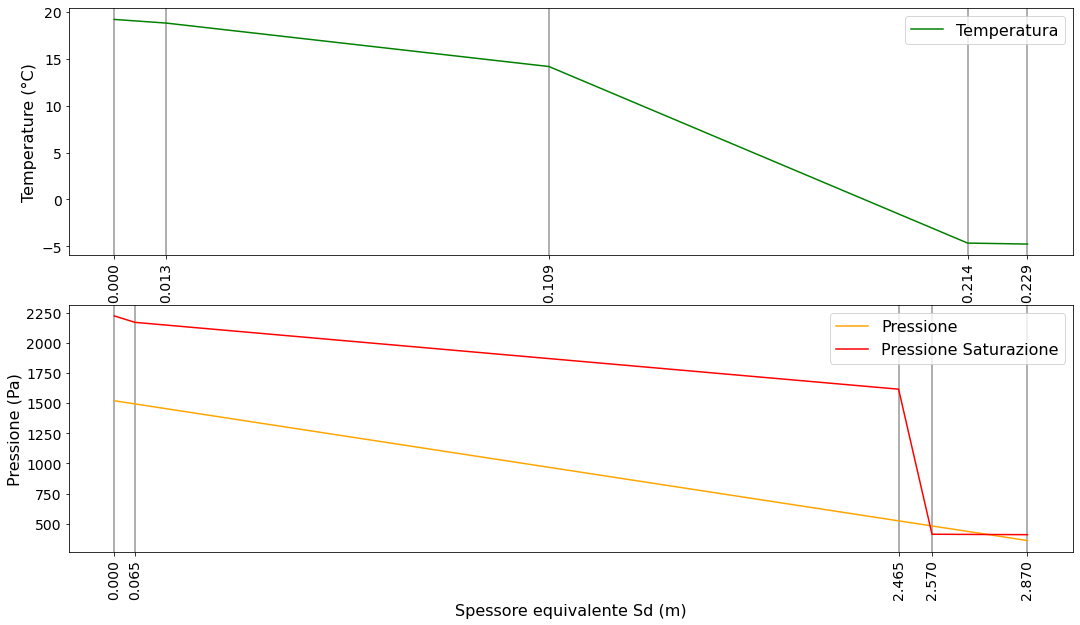

In [112]:
#plt.style.use('fast')

plt.figure(figsize=(18,10))


plt.subplot(2, 1, 1)
plt.plot(spessoriCumSum,temperature[1:-1],label="Temperatura",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore parete (m)",fontsize=16)  
plt.ylabel("Temperature (°C)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(spessoriCumSum, rotation=90, fontsize=14)
#plt.yticks(temperature,fontsize=12) #i due vettori affiancati
plt.yticks(fontsize=14)

plt.subplot(2,1,2)
plt.plot(SdCumSum,pressioni,label="Pressione",color='orange')
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="Pressione Saturazione",color='red')
#plt.plot(SdCumSum,100*temperature[1:-1],label="temperature",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore equivalente Sd (m)",fontsize=16)  
plt.ylabel("Pressione (Pa)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(SdCumSum,fontsize=14,rotation=90,color='black')
#plt.yticks(np.hstack((pressioni,pressioniSaturazione)),fontsize=14) #i due vettori affiancati
plt.yticks(fontsize=14)

import tikzplotlib
# modificare a mano:
# \begin{groupplot}[group style={group size=1 by 2,vertical sep=2.5cm}]
tikzplotlib.save("temperatura+pressione--parete-"+parete+".tex",
                 axis_width='\\linewidth',
                 axis_height='7cm',
                 strict=True,
                 extra_axis_parameters={'\t ticklabel style={ \n \t\t /pgf/number format/fixed, \n \t\t /pgf/number format/precision=5\n\t\t}, \nscaled ticks=false'}
                )

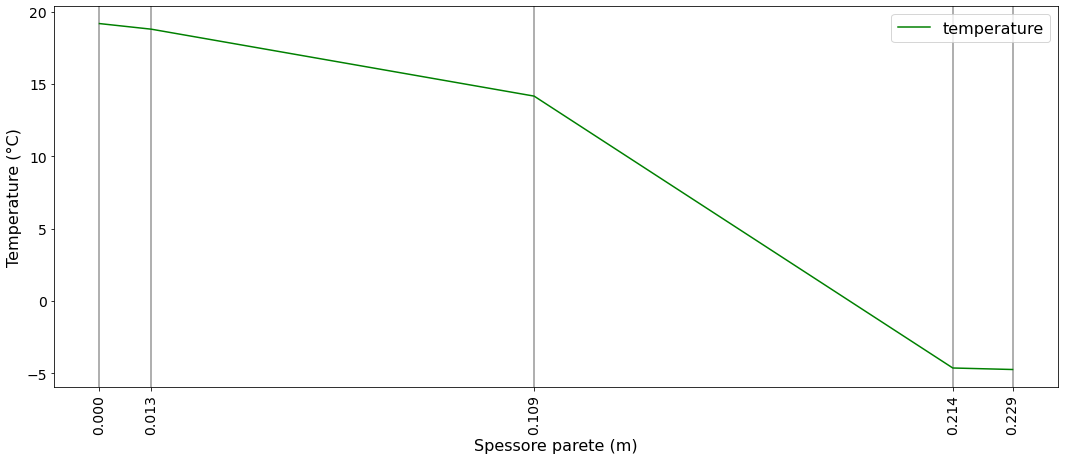

In [113]:
#plt.style.use('fast')

plt.figure(figsize=(18,7))
plt.plot(spessoriCumSum,temperature[1:-1],label="temperature",color='green')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore parete (m)",fontsize=16)  
plt.ylabel("Temperature (°C)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(spessoriCumSum, rotation=90, fontsize=14)
#plt.yticks(temperature,fontsize=12) #i due vettori affiancati
plt.yticks(fontsize=14)


import tikzplotlib



(array([ 250.,  500.,  750., 1000., 1250., 1500., 1750., 2000., 2250.,
        2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

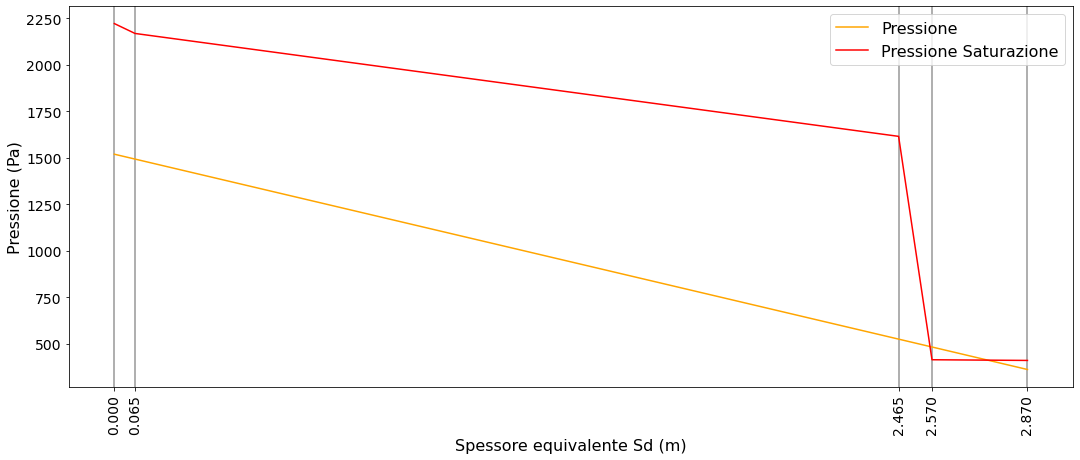

In [114]:
plt.figure(figsize=(18,7))

plt.plot(SdCumSum,pressioni,label="Pressione",color='orange')
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="Pressione Saturazione",color='red')
#plt.plot(SdCumSum,100*temperature[1:-1],label="temperature",color='green')
plt.ticklabel_format(style='sci')
plt.legend(loc="best",fontsize=16)
plt.xlabel("Spessore equivalente Sd (m)",fontsize=16)  
plt.ylabel("Pressione (Pa)",fontsize=16)
plt.grid(axis='x',linewidth=2)
plt.xticks(SdCumSum,fontsize=14,rotation=90,color='black')
#plt.yticks(np.hstack((pressioni,pressioniSaturazione)),fontsize=14) #i due vettori affiancati
plt.yticks(fontsize=14)





In [115]:
np.hstack((pressioni,pressioniSaturazione))

array([1519.01824347, 1492.79277364,  524.46773371,  482.10351321,
        361.06288322, 2336.9511438 , 2221.60539713, 2168.45182859,
       1615.05395862,  413.55111717,  409.87728665,  401.18098135])

In [116]:
profonditàPenetrazione = np.sqrt((trasmittanze*tempo*3600)/(  math.pi*densità * caloreSpecifico))
print("Profondità penetrazione (delta) = ",profonditàPenetrazione)
xi = spessori/profonditàPenetrazione
print("xi = ",xi)

# Calcola le matrice di trasferimento di ogni strato e le inserisce in una lista, 
# per poi moltiplicarle tra di loro in Z

zz = [] # zz : lista di matrici z
for i in range(0,len(xi)):
    # z : matrice per ogni strato
    z = np.zeros((2,2),dtype=np.complex128) # matrice complex float
    z[0][0] = complex(  (np.cosh(xi[i])*np.cos(xi[i])) , (np.sinh(xi[i])*np.sin(xi[i]))  )
    z[1][1] = z[0][0] 
    z[0][1] = -(profonditàPenetrazione[i]/(2*trasmittanze[i])) * complex(  (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i])) , (np.cosh(xi[i])*np.sin(xi[i]) - np.sinh(xi[i])*np.cos(xi[i]))  )
    z[1][0] = -(trasmittanze[i]/( profonditàPenetrazione[i]))  * complex(  (np.sinh(xi[i])*np.cos(xi[i]) - np.cosh(xi[i])*np.sin(xi[i])) , (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i]))  )
    # aggiunge alla lista zz
    zz.append(z)
print("zz = ",zz)

# Z: matrice di trasferimento totale  del componente edilizio = Z_N * Z_n-1 * ... * Z_1   
Z = np.zeros((2,2),dtype=np.complex128)
Z = zz[-1] #Z_N
for i in range(1,len(zz)): # [1  2 ... N  N+1)
    Z = Z.dot(zz[-1-i]) # prodotto scalare
print("Z =",Z)   

Profondità penetrazione (delta) =  [0.06756882 0.06685111 0.11554425 0.1172646 ]
xi =  [0.19239644 1.43602703 0.90874278 0.12791584]
zz =  [array([[ 0.99977163+3.70158267e-02j, -0.06190193-7.63825292e-04j],
       [ 0.01475605-1.19585953e+00j,  0.99977163+3.70158267e-02j]]), array([[ 0.29840601+1.96506319j, -0.63437138-0.49735475j],
       [ 3.76154045-4.79780999j,  0.29840601+1.96506319j]]), array([[ 0.88652321+0.81955929j, -2.93186472-0.82313257j],
       [ 0.15105643-0.53803851j,  0.88652321+0.81955929j]]), array([[ 0.99995538+1.63624131e-02j, -0.01666652-9.09024493e-05j],
       [ 0.01070919-1.96347789e+00j,  0.99995538+1.63624131e-02j]])]
Z = [[-25.49537426+11.10878215j   2.03117186 -7.74034467j]
 [ 33.4489196 +50.98668532j -17.51340798 -1.53789418j]]


In [117]:
# Strato d'aria interno 
Zsi = np.zeros((2,2),dtype=np.complex128)
Zsi[0][0] = complex(1,0)
Zsi[1][1] = complex(1,0)
Zsi[0][1] = complex(-Rsi)
Zsi[1][0] = complex(0,0)
print("Zsi = ",Zsi)

# Strato d'aria esterno
Zse = np.zeros((2,2),dtype=np.complex128)
Zse[0][0] = complex(1,0)
Zse[1][1] = complex(1,0)
Zse[0][1] = complex(-Rse)
Zse[1][0] = complex(0,0)
print("Zse = ",Zse)

# Zee: matrice di trasferimento da ambiente ad ambiente 
Zee = Zse.dot(Z)
Zee = Zee.dot(Zsi)
print("Zee = ",Zee)

Zsi =  [[ 1.  +0.j -0.13+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zse =  [[ 1.  +0.j -0.04+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zee =  [[-26.83333104 +9.06931474j   6.22004121 -8.85783982j]
 [ 33.4489196 +50.98668532j -21.86176753 -8.16616327j]]


In [118]:
Y12 = -1/Zee[0][1]
Y12 = np.sqrt((Y12.real)**2 + (Y12.imag)**2) # il modulo
print("Y12 = ", Y12, "(trasmittanza termica periodica)")

#f = -np.sqrt((Y12.real)**2 + (Y12.imag)**2)/(1/Rtot)
fd = -Y12/(1/Rtot)
print("fd = ", fd, "(attenuazione)")

phase = (math.atan2(Zee[0][1].imag,Zee[0][1].real))*tempo/(2*math.pi) # tempo in ore
sfasamento = phase+tempo/2 # tempo in ore
print("phase = ", phase)
print("sfasamento = ", sfasamento, "[ore]")

Y11 = -Zee[0][0]/Zee[0][1]
Y11 = np.sqrt((Y11.real)**2 + (Y11.imag)**2) # il modulo
print("Y11 = ", Y11, "(ammettenza termica interna Yii)")

Y22 = -Zee[1][1]/Zee[0][1]
Y22 = np.sqrt((Y22.real)**2 + (Y22.imag)**2) # il modulo
print("Y22 = ", Y22, "(ammettenza termica esterna Yee)")

Y12 =  0.09239073252991933 (trasmittanza termica periodica)
fd =  -0.3683648964451135 (attenuazione)
phase =  -3.6615455398750565
sfasamento =  8.338454460124943 [ore]
Y11 =  2.6169259101305866 (ammettenza termica interna Yii)
Y22 =  2.1561374363262544 (ammettenza termica esterna Yee)


In [119]:
1-Rsi*Y22

0.7197021332775869

In [120]:
1-Rse*Y11

0.8953229635947766

### calcolo di alcune proprietà della parete

In [121]:
massaSuperficiale = spessori*densità
massaSuperficialeTot = sum(massaSuperficiale)
print("Massa superficiale = ", massaSuperficialeTot)


capacitàTermicaAreica = spessori*densità*caloreSpecifico
capacitàTermicaAreicaTot = sum(capacitàTermicaAreica)
print("Capacità termica areica = ", capacitàTermicaAreica, "\nTotale = ", capacitàTermicaAreicaTot )


diffusivitàTermica = trasmittanze / (densità * caloreSpecifico)
print("Diffusività termica = ", diffusivitàTermica)

#k1 = omega * modulo(Z11-1/Z12)
k1 = ((tempo*3600)/(2*math.pi) * np.sqrt((((Zee[0][0]-1)/Zee[0][1]).real)**2 
           + (((Zee[0][0]-1)/Zee[0][1]).imag)**2))/1000 #kJ/m2 K
print("Capacità termica areica interna", k1)
k2 = ((tempo*3600)/(2*math.pi) * np.sqrt((((Zee[1][1]-1)/Zee[0][1]).real)**2 
           + (((Zee[1][1]-1)/Zee[0][1]).imag)**2))/1000 #kJ/m2 K
print("Capacità termica areica esterna", k2)

Massa superficiale =  97.3
Capacità termica areica =  [16445.  76800.   7570.5 27000. ] 
Totale =  127815.5
Diffusività termica =  [1.66007905e-07 1.62500000e-07 4.85436893e-07 5.00000000e-07]
Capacità termica areica interna 37.19111612438548
Capacità termica areica esterna 30.84236620338379


In [152]:
# Salvataggio output su un nuovo dizionario
#paretiOutput=pareti.copy()

paretiOutput[parete]["Sd"]=Sd
paretiOutput[parete]["spessoreTot"]=spessoreTot
paretiOutput[parete]["resistenze"]=resistenze
paretiOutput[parete]["resistenzeTot"]=Rtot
paretiOutput[parete]["temperature"]=temperature
paretiOutput[parete]["pressioniSaturazione"]=pressioniSaturazione
paretiOutput[parete]["pressioni"]=pressioni
paretiOutput[parete]["profonditàPenetrazione"]=profonditàPenetrazione
paretiOutput[parete]["xi"]=xi
paretiOutput[parete]["attenuazione"]=fd
paretiOutput[parete]["sfasamento"]=sfasamento
paretiOutput[parete]["trasmittanzaTermicaPeriodica"]=Y12
paretiOutput[parete]["ammettanzaInterna"]=Y11
paretiOutput[parete]["ammettanzaEsterna"]=Y22
paretiOutput[parete]["capacitàTermicaAreica"]=capacitàTermicaAreica
paretiOutput[parete]["capacitàTermicaAreicaTot"]=capacitàTermicaAreicaTot
paretiOutput[parete]["CapacitàTermicaAreicaInterna"]=k1
paretiOutput[parete]["CapacitàTermicaAreicaEsterna"]=k2                     
paretiOutput[parete]["massaSuperficiale"]=massaSuperficiale
paretiOutput[parete]["massaSuperficialeTot"]=massaSuperficialeTot
paretiOutput[parete]["diffusivitàTermica"]=diffusivitàTermica*10**7



paretiOutput[parete]

{'descrizione': 'Perete in X-LAM con isolante bassa densità lana di roccia',
 'strati': ['Gessofibra',
  'X-LAM KLH',
  'Isolante VentirockDuo',
  'Intonaco calce'],
 'spessori': array([0.013, 0.096, 0.105, 0.015]),
 'trasmittanze': array([0.21 , 0.13 , 0.035, 0.9  ]),
 'mu': array([ 5., 25.,  1., 20.]),
 'densità': array([1150.,  500.,   70., 1800.]),
 'caloreSpecifico': array([1100., 1600., 1030., 1000.]),
 'Sd': array([0.065, 2.4  , 0.105, 0.3  ]),
 'spessoreTot': 0.22899999999999998,
 'resistenze': array([0.13      , 0.06190476, 0.73846154, 3.        , 0.01666667,
        0.04      ]),
 'resistenzeTot': 3.9870329670329667,
 'temperature': array([20.        , 19.18485751, 18.79669441, 14.16629917, -4.64468148,
        -4.74918692, -5.        ]),
 'pressioniSaturazione': array([2336.9511438 , 2221.60539713, 2168.45182859, 1615.05395862,
         413.55111717,  409.87728665,  401.18098135]),
 'pressioni': array([1519.01824347, 1492.79277364,  524.46773371,  482.10351321,
         361.

In [123]:
print("Sfasamento:") 
for key in pareti.keys():
    if "sfasamento" in pareti[key].keys():
        print("parete" ,key," : ",pareti[key]["sfasamento"])

print("Attenuazione:")        
for key in pareti.keys():
    if "attenuazione" in pareti[key].keys():
        print("parete" ,key," : ",pareti[key]["attenuazione"])        

Sfasamento:
parete 1a  :  11.745115676141618
parete 1b  :  12.007073313736608
parete 3a  :  9.207990430094306
parete 3b  :  8.338454460124943
parete 3c  :  13.653005474566445
Attenuazione:
parete 1a  :  -0.2067184624886907
parete 1b  :  -0.16774243124237687
parete 3a  :  -0.34205971533349355
parete 3b  :  -0.3683648964451135
parete 3c  :  -0.180745877372917


In [124]:
col = ['strati','spessori','trasmittanze','mu']#colonne da tenere
df = pd.DataFrame(pareti[parete],columns=col) 

with open('tabella-input-'+parete+'.tex','w') as f:
    f.write(
            df.to_latex(
            index=False,
            decimal=",",
            caption=pareti[parete]["descrizione"],
            column_format="lrrr",
            header=["Strati","Spessori","Trasmitttanza", "mu"],
            )
        )
    f.close()
df   

,strati,spessori,trasmittanze,mu
0,Gessofibra,0.013,0.210,5.0
1,X-LAM KLH,0.096,0.130,25.0
2,Isolante VentirockDuo,0.105,0.035,1.0
3,Intonaco calce,0.015,0.900,20.0


In [153]:
totalDF = pd.DataFrame(pareti)
totalDF

,1a,1b,3a,3b,3c
descrizione,Parete in muratura con isolante interno,Parete in muratura con isolante esterno,Perete in X-LAM con isolante bassa densità,Perete in X-LAM con isolante bassa densità lan...,Perete in X-LAM con isolante alta densità fibr...
strati,"[Intonaco, Isolante VentirockDuo, Laterizio Po...","[Intonaco, Laterizio Poroton, Isolante Ventiro...","[Gessofibra, X-LAM KLH, Isolante bassa densità...","[Gessofibra, X-LAM KLH, Isolante VentirockDuo,...","[Gessofibra, X-LAM KLH, Isolante alta densità ..."
spessori,"[0.015, 0.14, 0.2, 0.015]","[0.015, 0.2, 0.14, 0.015]","[0.013, 0.096, 0.12, 0.015]","[0.013, 0.096, 0.105, 0.015]","[0.013, 0.096, 0.13, 0.015]"
trasmittanze,"[0.6, 0.035, 0.23, 0.9]","[0.6, 0.23, 0.035, 0.9]","[0.21, 0.13, 0.038, 0.9]","[0.21, 0.13, 0.035, 0.9]","[0.21, 0.13, 0.043, 0.9]"
mu,"[6.0, 1.0, 10.0, 8.0]","[6.0, 10.0, 1.0, 8.0]","[5.0, 25.0, 1.0, 20.0]","[5.0, 25.0, 1.0, 20.0]","[5.0, 25.0, 5.0, 20.0]"
densità,"[1500.0, 70.0, 860.0, 1800.0]","[1500.0, 860.0, 70.0, 1800.0]","[1150.0, 500.0, 50.0, 1800.0]","[1150.0, 500.0, 70.0, 1800.0]","[1150.0, 500.0, 190.0, 1800.0]"
caloreSpecifico,"[1000.0, 1030.0, 840.0, 1000.0]","[1000.0, 840.0, 1030.0, 1000.0]","[1100.0, 1600.0, 2100.0, 1000.0]","[1100.0, 1600.0, 1030.0, 1000.0]","[1100.0, 1600.0, 2100.0, 1000.0]"
Sd,"[0.09, 0.14, 2.0, 0.12]","[0.09, 2.0, 0.14, 0.12]","[0.065, 2.4, 0.12, 0.3]","[0.065, 2.4, 0.105, 0.3]","[0.065, 2.4, 0.65, 0.3]"
spessoreTot,0.37,0.37,0.244,0.229,0.254
resistenze,"[0.13, 0.025, 4.0, 0.8695652173913043, 0.01666...","[0.13, 0.025, 0.8695652173913043, 4.0, 0.01666...","[0.13, 0.06190476190476191, 0.7384615384615385...","[0.13, 0.06190476190476191, 0.7384615384615385...","[0.13, 0.06190476190476191, 0.7384615384615385..."


In [160]:
col = ['strati','spessori','densità','caloreSpecifico','massaSuperficiale','profonditàPenetrazione','xi','diffusivitàTermica']#colonne da tenere
df = pd.DataFrame(pareti[parete],columns=col) 
df = df.round({'profonditàPenetrazione':3,'xi':3,'diffusivitàTermica':2}) # arrotonda le cifre decimali
# oppure
# decimals = pd.Series([3,3], index=['profonditàPenetrazione','xi'])
# df = df.round(decimals)

with open('tabella-dinamica-'+parete+'.tex','w') as f:
    f.write(
            df.to_latex(
            index=False,
            decimal=",",
            caption=pareti[parete]["descrizione"],
            column_format="lrrrrrr",
            header=["Strati","Spessori","Densità", "Calore specifico","Massa superficiale","Profondità di Penetrazione","xi","Diffusività termica x 10-7"],
            )
        )  
    f.write("\n\\begin{flushleft}\n")
    f.write("\\begin{align*}\n")
    f.write("\\text{Massa superficiale totale} &= \SI{")
    f.write(str(massaSuperficialeTot))
    f.write("}{\\kilo\\gram\\per\\metre\\squared}\\\\\n")
    f.write("\\text{Sfasamento} &= \SI{")
    f.write(str(round(sfasamento,2)))
    f.write("}{\\hour}\\\\\n")
    f.write("\\text{Attenuazione} &= \SI{")
    f.write(str(abs(round(fd,3))))
    f.write("}{}\n")
    f.write("\\end{align*}")
    f.write("\n\\end{flushleft}\n")
f.close()
df   

,strati,spessori,densità,caloreSpecifico,massaSuperficiale,profonditàPenetrazione,xi,diffusivitàTermica
0,Gessofibra,0.013,1150.0,1100.0,14.95,0.068,0.192,1.66
1,X-LAM KLH,0.096,500.0,1600.0,48.00,0.067,1.436,1.62
2,Isolante VentirockDuo,0.105,70.0,1030.0,7.35,0.116,0.909,4.85
3,Intonaco calce,0.015,1800.0,1000.0,27.00,0.117,0.128,5.00


In [127]:
# Crea delle liste dei valori dentro al dizionario che è dentro all'altro dizionario
# esempio:   prova = makeListFromDoubleDicts(pareti,'descrizione')
def makeListFromDoubleDicts(dict1,dictKey):
    self = [] 
    for i in dict1.keys():
        self.append(dict1[i][dictKey])
    return self   

In [162]:
resistenzeTot=makeListFromDoubleDicts(paretiOutput,'resistenzeTot')
sfasamenti=makeListFromDoubleDicts(pareti,'sfasamento')
masseSuperficiali=makeListFromDoubleDicts(pareti,'massaSuperficialeTot')
attenuazioni=makeListFromDoubleDicts(pareti,'attenuazione')
spessoriTot=makeListFromDoubleDicts(pareti,'spessoreTot')
capacitàTermicaAreicheInterne=makeListFromDoubleDicts(pareti,'CapacitàTermicaAreicaInterna')
trasmittanzeTermichePeriodiche=makeListFromDoubleDicts(pareti,'trasmittanzaTermicaPeriodica')



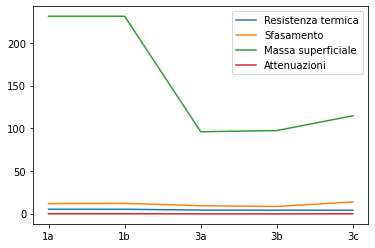

In [129]:
# mettere senza asse y oppure con doppi assi
# scegliere le altre proprietà da stapare
# mettere solo i punti, senza l'unione linee

plt.plot(paretiOutput.keys(),resistenzeTot,label='Resistenza termica')
plt.plot(paretiOutput.keys(),sfasamenti,label='Sfasamento')
plt.plot(paretiOutput.keys(),masseSuperficiali,label='Massa superficiale')
plt.plot(paretiOutput.keys(),attenuazioni,label='Attenuazioni')


plt.legend(loc='best')


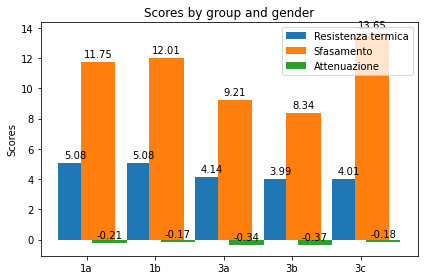

In [171]:

labels = paretiOutput.keys()

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/3, resistenzeTot, width, label='Resistenza termica')
rects2 = ax.bar(x + width/3, sfasamenti, width, label='Sfasamento')
rects3 = ax.bar(x + 2*width/3, attenuazioni, width, label='Attenuazione')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.show()

<BarContainer object of 4 artists>

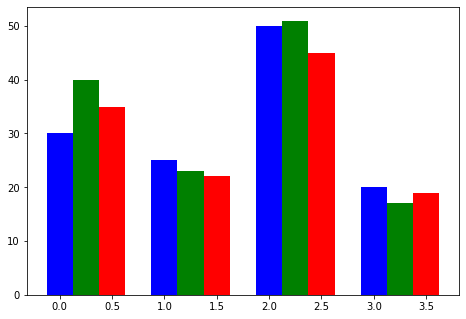

In [131]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [132]:
np.array(capacitàTermicaAreicheInterne)*0.1

array([2.46054821, 4.39646904, 3.6993981 , 3.71911161, 3.56073268])

In [133]:
list(paretiOutput.keys())

['1a', '1b', '3a', '3b', '3c']

In [176]:
bar

NameError: name 'bar' is not defined

<ipython-input-178-0424674dd0ab>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(paretiOutput.keys())) # altrimenti parte dal secondo elemento


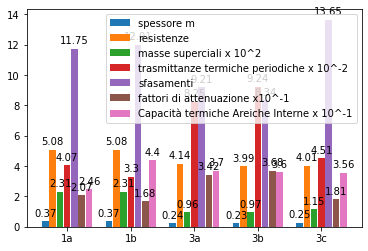

In [178]:
#  https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])
            autolabel(bar)
        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),loc='best')


if __name__ == "__main__":
    # Usage example:
    data = {
        "spessore m": spessoriTot,
        "resistenze": resistenzeTot,
        "masse superciali x 10^2": np.array(masseSuperficiali)*0.01,
        "trasmittanze termiche periodiche x 10^-2": np.array(trasmittanzeTermichePeriodiche)*100,
        "sfasamenti": sfasamenti,
        "fattori di attenuazione x10^-1": abs(np.array(attenuazioni))*10,
        "Capacità termiche Areiche Interne x 10^-1" : np.array(capacitàTermicaAreicheInterne)*0.1    
    }

    fig, ax = plt.subplots()
    bar_plot(ax, data, total_width=.8, single_width=.9)
    #ax.set_xticks(x) #dà problemi
    ax.set_xticklabels(['']+list(paretiOutput.keys())) # altrimenti parte dal secondo elemento
    tikzplotlib.save("confronto.tex",
                 axis_width='\\linewidth',
                 axis_height='15cm',
                 #strict=True,
                 #extra_axis_parameters={'\t ticklabel style={ \n \t\t /pgf/number format/fixed, \n \t\t /pgf/number format/precision=5\n\t\t}, \nscaled ticks=false'}
                )

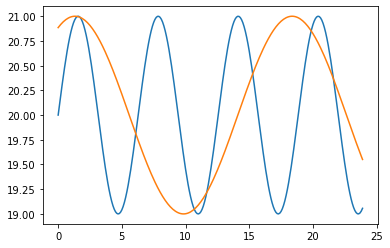

In [140]:
x=np.arange(0,24,0.1)
plt.plot(x,np.sin(x)+20)
plt.plot(x,np.sin(fd*x+sfasamento)+20)